In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [109]:
detection_df = pd.read_excel('detections.xlsx')
ground_truth_df = pd.read_excel('ground-truth.xlsx')

detection_df.sort_values(by=['score'], ascending=False, inplace= True)
detection_df.reset_index(drop=True, inplace=True)

detc_box = [[detection_df['x'][i], detection_df['y'][i], detection_df['w'][i], detection_df['h'][i]] for i in range(len(detection_df))]
grond_box = [[ground_truth_df['x'][i],ground_truth_df['y'][i],ground_truth_df['w'][i],ground_truth_df['h'][i]] for i in range(len(ground_truth_df))]


In [141]:
def intersection_over_union (g_box, p_box): 
    t_area = g_box[2] * g_box[3]
    p_area = p_box[2] * p_box[3]
    x1 = max(g_box[0] - (g_box[2] / 2), p_box[0] - (p_box[2] / 2))
    x2 = min(g_box[0] + (g_box[2] / 2), p_box[0] + (p_box[2] / 2))
    y1 = max(g_box[1] - (g_box[3] / 2), p_box[1] - (p_box[3] / 2))
    y2 = min(g_box[1] + (g_box[3] / 2), p_box[1] + (p_box[3] / 2))
    intersection = (x2 - x1) * (y2 - y1)
    if intersection <= 0 or x2 <x1 or y2<y1:
        return 0
    union = t_area + p_area - intersection
    iou = intersection / union
    return iou
    

In [142]:
def AP(gt_box, pred_box, plot = True, iou_th = 0.25, num_recall_points = 5 ):
    num_gt = len(gt_box)
    num_pred = len(pred_box)
    TP = np.zeros(num_pred)
    FP = np.zeros(num_pred)
    cum_TP = np.zeros(num_pred)
    cum_FP = np.zeros(num_pred)
    gt_mached = []
    for i in range(num_pred):
        one_pred_box = pred_box[i]
        iou_list = []
        for gt in range(num_gt):
            iou_list.append(intersection_over_union(gt_box[gt], one_pred_box))
            max_ind = np.argmax(iou_list)     
        if iou_list[max_ind] < iou_th:
            FP[i] = 1
        elif (iou_list[max_ind] > iou_th) and (max_ind not in gt_mached):
            TP[i] = 1
            gt_mached.append(max_ind)
        cum_TP[i] = np.sum(TP)
        cum_FP[i] = np.sum(FP)
    cum_precision = np.where(cum_TP + cum_FP > 0, cum_TP/(cum_TP + cum_FP), 0)
    cum_recall = cum_TP / num_gt
    plt.plot(cum_recall, cum_precision)
    plt.xlabel('recall')
    plt.ylabel('precision')
    average_precision = 0
    for t in np.linspace(start=0, stop=1, num=num_recall_points, endpoint=True):
        cum_prec_recall_greater_t = cum_precision[cum_recall >= t]
        if cum_prec_recall_greater_t.size == 0:
            precision = 0
        else:
            precision = np.amax(cum_prec_recall_greater_t)
        average_precision += precision
    average_precision /= num_recall_points
    print('AP_{} = {}'.format(iou_th,round(average_precision, 2)))
    cp = [round(i, 2) for i in cum_precision]
    cr = [round(i, 2) for i in cum_recall]
    print('prec : {}'.format(cp))
    print('rec  : {}'.format(cr))

AP_0.25 = 0.57
prec : [1.0, 0.5, 0.67, 0.5, 0.6, 0.5, 0.57, 0.5]
rec  : [0.2, 0.2, 0.4, 0.4, 0.6, 0.6, 0.8, 0.8]


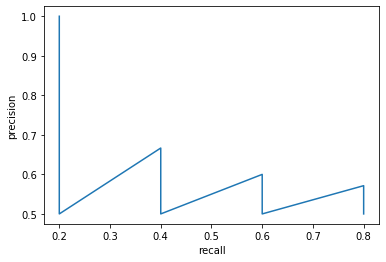

In [143]:
AP(grond_box, detc_box, plot = True, iou_th = 0.25, num_recall_points = 10)

AP_0.5 = 0.45
prec : [1.0, 0.5, 0.67, 0.5, 0.6, 0.5, 0.43, 0.38]
rec  : [0.2, 0.2, 0.4, 0.4, 0.6, 0.6, 0.6, 0.6]


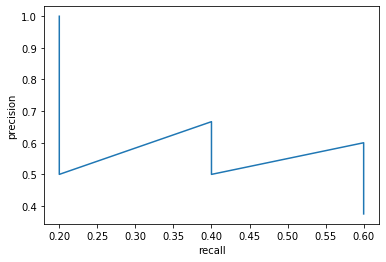

In [144]:
AP(grond_box, detc_box, plot = True, iou_th = 0.5, num_recall_points = 10)

AP_0.75 = 0.16
prec : [0.0, 0.0, 0.33, 0.25, 0.4, 0.33, 0.29, 0.25]
rec  : [0.0, 0.0, 0.2, 0.2, 0.4, 0.4, 0.4, 0.4]


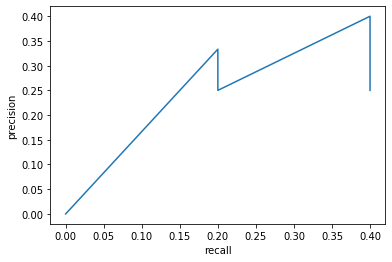

In [145]:
AP(grond_box, detc_box, plot = True, iou_th = 0.75, num_recall_points = 10)